# Continuous Distributions

Up to now we've considered discrete RV, ie ones that assume values from a finite/countable set.  Now let's look at the much more common case of continues RVs.

Potentially Infinite range in $\mathbb{R}$:
$$X \in (-\infty, \infty)$$

Only makes sense to talk about probablity of $X$ between values, such as $a$ and $b$ as
$$P(X=a)=0, \forall a$$
because the set of potential values is infinite, hence the probability of any individual element is zero.  

As a result talk in terms of $f(x)$ the Probability Density Function (PDF), rather than the PMF.  To get to a probability we need to integrate
$$
P(a\le X\le b) = \int_a^b f(x)dx
$$
which is the probability that X lies within the range $[a,b]$

To be valid the probability of the entire set must by 1 (ie, correct normalization)
$$ \int_{-\infty}^{\infty}f(x)dx = 1$$

The most commonly enconutered continous RVs are the Gaussian (or Normal) and Exponential, which is a special case of the Gamma.

OK, lets explore this all.

## The Normal Distribution

In [6]:
# Import useful libraries
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# Set some nice plot defaults
plt.rcParams['figure.figsize'] = (10, 8)#(16, 10)   # Bigger
sns.set_style("darkgrid")

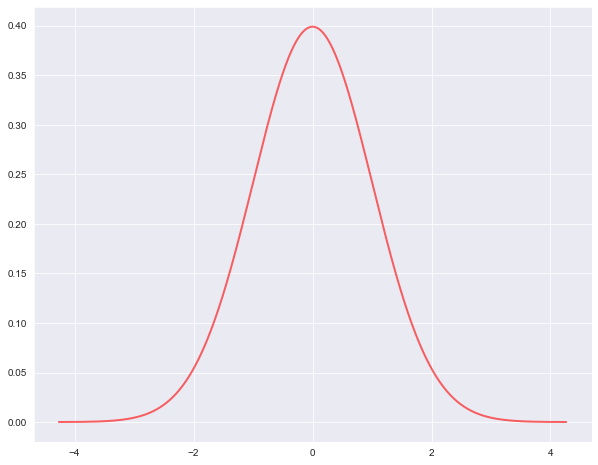

In [16]:
# We've all seen the Gaussian

fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.00001),
                norm.ppf(0.99999), 10000)

m = 0
u = 1
ax.plot(x, norm.pdf(x, m, u), 'r-', lw=2, alpha=0.6, label='norm pdf')


### Why normal ?
This distribution arises when a large number of small, independent events are additively combined to create a final effect.  The proof of this is a little advanced and called the Central Limit Theorem.  It is one of the core findings in statistics.  But we have serpents...

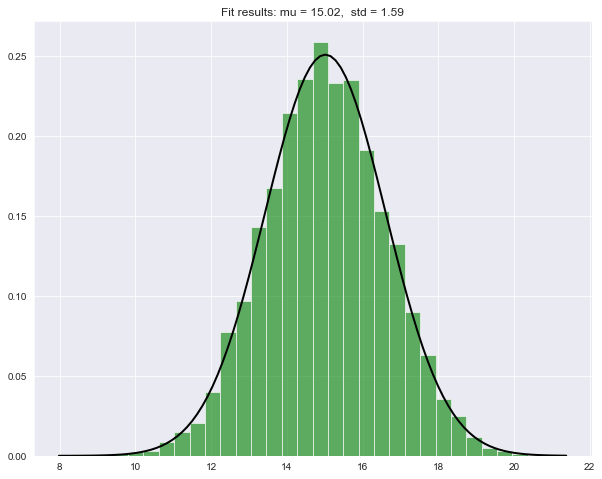

In [17]:
# Parameters
sample_size = 1000  # Size of each sample
num_samples = 10000  # Number of samples to generate
num_variables = 30   # Number of random variables to sum

# Generate a large number of samples, each containing the sum of `num_variables` i.i.d. uniform random variables
samples = np.sum(np.random.uniform(0, 1, (num_samples, num_variables)), axis=1)

# Plot a histogram of the samples to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Plot the normal distribution for comparison
from scipy.stats import norm
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(samples), np.std(samples))
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (np.mean(samples), np.std(samples))
plt.title(title)
plt.show()